## 빅데이터 활용 AI 설계
# 강화학습 맛보기2
- 매번 움직일 때 마다 보상값을 -1 로 준다.
- 목표 Cell 에서의 보상값은 0 이다.
- gamma 를 1 로 준다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
Q = np.zeros([25,4])-10
Qs = []
gamma = 1.

### 적용식

$$ (s,a) \Rightarrow r, s' $$
$$ Q_{new}(s,a) = r + \gamma \cdot max_{a'}[Q(s',a')] $$

- s: state
- a: action
- r: reward
- s': new state
- $\gamma$: discount rate
- s,a -> r,s -> a : sarsa

In [17]:
def valid_action(s, a):
    if s//5==0 and a==0: return False
    if s//5==4 and a==1: return False
    if s%5==0 and a==2: return False
    if s%5==4 and a==3: return False
    return True

In [18]:
s = 0
ds = [-5,5,-1,1]

for epoch in range(100):
    for s in range(25):
        if s==24: # the last(goal) cell
            Q[s] = 0
            continue
            
        for a in range(4):
            if not valid_action(s,a): continue
            s_new = s + ds[a]
            Q[s,a] = -1 + gamma*np.max(Q[s_new])
         
    Qs.append(Q.copy())

In [19]:
Q

array([[-10.,  -8., -10.,  -8.],
       [-10.,  -7.,  -9.,  -7.],
       [-10.,  -6.,  -8.,  -6.],
       [-10.,  -5.,  -7.,  -5.],
       [-10.,  -4.,  -6., -10.],
       [ -9.,  -7., -10.,  -7.],
       [ -8.,  -6.,  -8.,  -6.],
       [ -7.,  -5.,  -7.,  -5.],
       [ -6.,  -4.,  -6.,  -4.],
       [ -5.,  -3.,  -5., -10.],
       [ -8.,  -6., -10.,  -6.],
       [ -7.,  -5.,  -7.,  -5.],
       [ -6.,  -4.,  -6.,  -4.],
       [ -5.,  -3.,  -5.,  -3.],
       [ -4.,  -2.,  -4., -10.],
       [ -7.,  -5., -10.,  -5.],
       [ -6.,  -4.,  -6.,  -4.],
       [ -5.,  -3.,  -5.,  -3.],
       [ -4.,  -2.,  -4.,  -2.],
       [ -3.,  -1.,  -3., -10.],
       [ -6., -10., -10.,  -4.],
       [ -5., -10.,  -5.,  -3.],
       [ -4., -10.,  -4.,  -2.],
       [ -3., -10.,  -3.,  -1.],
       [  0.,   0.,   0.,   0.]])

In [20]:
Q.max(axis=1).reshape(5,5)

array([[-8., -7., -6., -5., -4.],
       [-7., -6., -5., -4., -3.],
       [-6., -5., -4., -3., -2.],
       [-5., -4., -3., -2., -1.],
       [-4., -3., -2., -1.,  0.]])

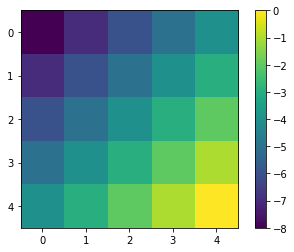

In [21]:
plt.imshow(Q.max(axis=1).reshape(5,5))
plt.colorbar()

In [22]:
Qs = np.array(Qs).reshape(-1,25,4)
Qs.shape

(100, 25, 4)

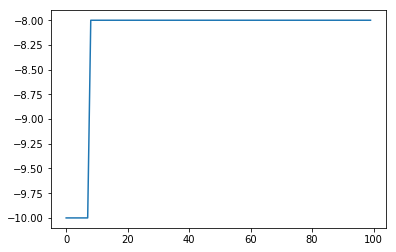

In [23]:
plt.plot(Qs.max(axis=2)[:,0])